In [140]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from os import walk


## Simply test a team within a season to take a look at the data

In [7]:
# read the file and display
df = pd.read_csv("../data/season_record_LAA_2017.csv", index_col=0)
display(df.head())
display(df.tail())

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Monday, Apr 3",LAA,@,OAK,L,2.0,4.0,9.0,0-1,3.0,1.0,Graveman,Nolasco,Casilla,2:56,N,36067.0,1.05,-1,NaN
2,"Tuesday, Apr 4",LAA,@,OAK,W,7.0,6.0,9.0,1-1,2.0,1.0,Bailey,Dull,Bedrosian,3:17,N,11225.0,1.02,1,NaN
3,"Wednesday, Apr 5",LAA,@,OAK,W,5.0,0.0,9.0,2-1,2.0,1.0,Ramirez,Cotton,None,3:15,N,13405.0,1.08,2,NaN
4,"Thursday, Apr 6",LAA,@,OAK,L,1.0,5.0,9.0,2-2,2.0,1.0,Triggs,Skaggs,None,2:44,D,13292.0,1.15,-1,NaN
5,"Friday, Apr 7",LAA,Home,SEA,W,5.0,1.0,9.0,3-2,1.0,Tied,Chavez,Gallardo,None,2:56,N,43911.0,1.09,1,NaN


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
158,"Wednesday, Sep 27",LAA,@,CHW,L-wo,4.0,6.0,10.0,78-80,2.0,20.0,Farquhar,Parker,None,3:58,N,17012.0,0.01,-1,NaN
159,"Thursday, Sep 28",LAA,@,CHW,L,4.0,5.0,9.0,78-81,2.0,21.0,Infante,Chavez,Minaya,3:04,N,19596.0,0.00,-2,NaN
160,"Friday, Sep 29",LAA,Home,SEA,W,6.0,5.0,9.0,79-81,2.0,21.0,Wood,Rzepczynski,Parker,3:01,N,35106.0,0.00,1,NaN
161,"Saturday, Sep 30",LAA,Home,SEA,L,4.0,6.0,9.0,79-82,2.0,21.0,Lawrence,Bedrosian,Díaz,3:32,N,38075.0,0.00,-1,NaN
162,"Sunday, Oct 1",LAA,Home,SEA,W,6.0,2.0,9.0,80-82,2.0,21.0,Bridwell,Simmons,None,2:38,D,34940.0,0.00,1,NaN


In [25]:
# construct a new dataframe with the columns we want
statistics_df = df[["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"]]
# add columns for previous w/l, w-l and rank
statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
statistics_df["Prev_Rank"] = statistics_df["Rank"].shift(1)
statistics_df["Prev_Streak"] = statistics_df["Streak"].shift(1)
# add a column to determine if last game was overtime or not (using W/L column, if the value contains -wo, then it was overtime)
statistics_df["Prev_IsOvertime"] = statistics_df["W/L"].apply(lambda x: 1 if "-wo" in str(x) else 0).shift(1)

# add a winning-rate column (W / (W + L))

statistics_df["Winning_Rate"] = statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0])) / statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))
# add a column to show the game day of the week
statistics_df["Day"] = statistics_df["Date"].apply(lambda x: x.split(",")[0])
# add a column to show the game month
statistics_df["Month"] = statistics_df["Date"].apply(lambda x: x.split(",")[1].split(" ")[1])

# convert values containing -wo in W/L and Prev_W/L to W or L
statistics_df["W/L"] = statistics_df["W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
statistics_df["Prev_W/L"] = statistics_df["Prev_W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)

# display the new dataframe
display(statistics_df.head())
display(statistics_df.tail())


C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
C:\Users\user\AppData\Local\Temp\ipykernel_18844\3975637066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
1,"Monday, Apr 3",L,0-1,3.0,36067.0,-1,NaN,0-0,NaN,NaN,NaN,NaN,Monday,Apr
2,"Tuesday, Apr 4",W,1-1,2.0,11225.0,1,L,0-1,3.0,-1.0,0.0,0.000000,Tuesday,Apr
3,"Wednesday, Apr 5",W,2-1,2.0,13405.0,2,W,1-1,2.0,1.0,0.0,0.500000,Wednesday,Apr
4,"Thursday, Apr 6",L,2-2,2.0,13292.0,-1,W,2-1,2.0,2.0,0.0,0.666667,Thursday,Apr
5,"Friday, Apr 7",W,3-2,1.0,43911.0,1,L,2-2,2.0,-1.0,0.0,0.500000,Friday,Apr


,Date,W/L,W-L,Rank,Attendance,Streak,Prev_W/L,Prev_W-L,Prev_Rank,Prev_Streak,Prev_IsOvertime,Winning_Rate,Day,Month
158,"Wednesday, Sep 27",L,78-80,2.0,17012.0,-1,W,78-79,2.0,1.0,0.0,0.496815,Wednesday,Sep
159,"Thursday, Sep 28",L,78-81,2.0,19596.0,-2,L,78-80,2.0,-1.0,1.0,0.493671,Thursday,Sep
160,"Friday, Sep 29",W,79-81,2.0,35106.0,1,L,78-81,2.0,-2.0,0.0,0.490566,Friday,Sep
161,"Saturday, Sep 30",L,79-82,2.0,38075.0,-1,W,79-81,2.0,1.0,0.0,0.493750,Saturday,Sep
162,"Sunday, Oct 1",W,80-82,2.0,34940.0,1,L,79-82,2.0,-1.0,0.0,0.490683,Sunday,Oct


Text(0, 0.5, 'Winning Rate')

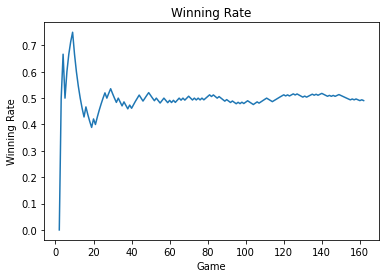

In [26]:
# plot winning rate line chart
plt.plot(statistics_df["Winning_Rate"])
plt.title("Winning Rate")
plt.xlabel("Game")
plt.ylabel("Winning Rate")

Text(0, 0.5, 'Attendance')

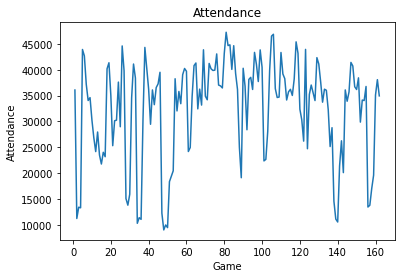

In [27]:
# plot attendance line chart
plt.plot(statistics_df["Attendance"])
plt.title("Attendance")
plt.xlabel("Game")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

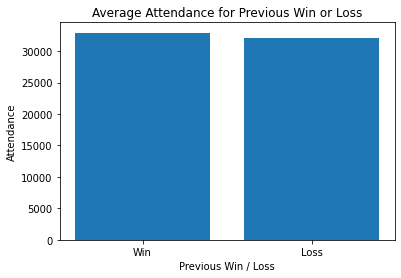

In [28]:
# plot a bar chart to see if previous game was win or loss, the average attendance difference

# calculate the average attendance when the previous game was win
prev_win_attendance = statistics_df[statistics_df["Prev_W/L"] == "W"]["Attendance"].mean()
# calculate the average attendance when the previous game was loss
prev_loss_attendance = statistics_df[statistics_df["Prev_W/L"] == "L"]["Attendance"].mean()
# plot bar chart
plt.bar(["Win", "Loss"], [prev_win_attendance, prev_loss_attendance])
plt.title("Average Attendance for Previous Win or Loss")
plt.xlabel("Previous Win / Loss")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

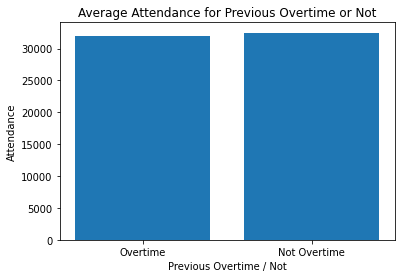

In [29]:
# plot a bar chart to see if previous game was overtime or not, the average attendance difference

# calculate the average attendance when the previous game was overtime
prev_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 1]["Attendance"].mean()
# calculate the average attendance when the previous game was not overtime
prev_not_overtime_attendance = statistics_df[statistics_df["Prev_IsOvertime"] == 0]["Attendance"].mean()
# plot bar chart
plt.bar(["Overtime", "Not Overtime"], [prev_overtime_attendance, prev_not_overtime_attendance])
plt.title("Average Attendance for Previous Overtime or Not")
plt.xlabel("Previous Overtime / Not")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

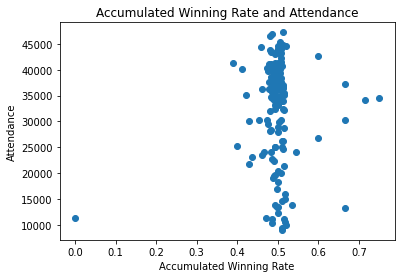

In [30]:
# plot a scatter chart to see accumulated winning rate and attendance

plt.scatter(statistics_df["Winning_Rate"], statistics_df["Attendance"])
plt.title("Accumulated Winning Rate and Attendance")
plt.xlabel("Accumulated Winning Rate")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

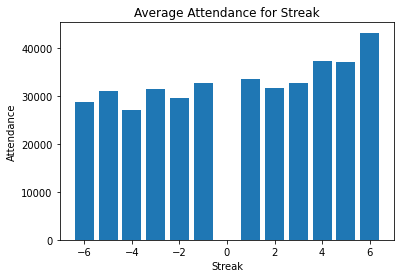

In [31]:
# plot a bar chart to see the streak and attendance

# get the streak values
streak_values = statistics_df["Streak"].unique()
# calculate the average attendance for each streak value
streak_attendance = [statistics_df[statistics_df["Streak"] == streak]["Attendance"].mean() for streak in streak_values]
# plot bar chart
plt.bar(streak_values, streak_attendance)
plt.title("Average Attendance for Streak")
plt.xlabel("Streak")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

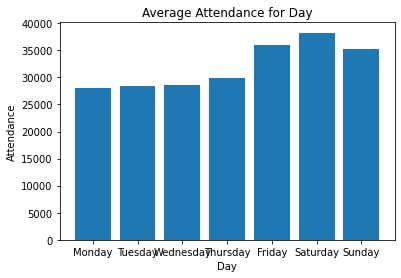

In [32]:
# plot a bar chart to see the day of the week and attendance

# get the day values
day_values = statistics_df["Day"].unique()
# calculate the average attendance for each day value
day_attendance = [statistics_df[statistics_df["Day"] == day]["Attendance"].mean() for day in day_values]
# plot bar chart
plt.bar(day_values, day_attendance)
plt.title("Average Attendance for Day")
plt.xlabel("Day")
plt.ylabel("Attendance")

Text(0, 0.5, 'Attendance')

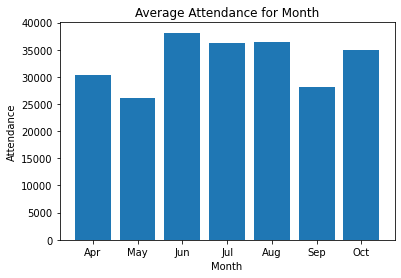

In [33]:
# plot a bar chart to see the month and attendance

# get the month values
month_values = statistics_df["Month"].unique()
# calculate the average attendance for each month value
month_attendance = [statistics_df[statistics_df["Month"] == month]["Attendance"].mean() for month in month_values]
# plot bar chart
plt.bar(month_values, month_attendance)
plt.title("Average Attendance for Month")
plt.xlabel("Month")
plt.ylabel("Attendance")

## Transform the previous analysis into a function

In [170]:
def generate_accumulated_season_record(team_abbr: str, from_year: int = 2015, to_year: int = 2022, exclude_years: set = {2019}) -> pd.DataFrame:
    accumulate_df = pd.DataFrame(columns = ["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"])
    # generate a set for all years
    years = set(range(from_year, to_year + 1))
    # remove excluded years from the set
    years = years - exclude_years
    # for every year, read the season record and transform it to an anaylizable dataframe
    for year in years:
        df = pd.read_csv(f"../data/season_record_{team_abbr}_{year}.csv", index_col=0)
        # construct a new dataframe with the columns we want
        statistics_df = df[["Date", "W/L", "W-L", "Rank", "Attendance", "Streak"]]
        # use isnull to filter out the rows with no attendance data
        statistics_df = statistics_df.dropna(subset=["Attendance"]).reset_index(drop=True)
        # add columns for previous w/l, w-l and rank
        statistics_df["Prev_W/L"] = statistics_df["W/L"].shift(1)
        statistics_df["Prev_W-L"] = statistics_df["W-L"].shift(1, fill_value="0-0")
        statistics_df["Prev_Rank"] = statistics_df["Rank"].shift(1)
        statistics_df["Prev_Streak"] = statistics_df["Streak"].shift(1)
        # add a column to determine if last game was overtime or not (using W/L column, if the value contains -wo, then it was overtime)
        statistics_df["Prev_IsOvertime"] = statistics_df["W/L"].apply(lambda x: 1 if "-wo" in str(x) else 0).shift(1)

        # add a winning-rate column (W / (W + L))

        statistics_df["Winning_Rate"] = statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0])) / statistics_df["Prev_W-L"].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))
        # add a column to show the game day of the week
        statistics_df["Day"] = statistics_df["Date"].apply(lambda x: x.split(",")[0])
        # add a column to show the game month
        statistics_df["Month"] = statistics_df["Date"].apply(lambda x: x.split(",")[1].split(" ")[1])

        # convert values containing -wo in W/L and Prev_W/L to W or L
        statistics_df["W/L"] = statistics_df["W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
        statistics_df["Prev_W/L"] = statistics_df["Prev_W/L"].apply(lambda x: str(x).split("-")[0] if "-wo" in str(x) else x)
        # concat the new dataframe to the accumulated dataframe
        accumulate_df = pd.concat([accumulate_df, statistics_df], ignore_index=True, sort=False)
    return accumulate_df

In [89]:
pd.options.mode.chained_assignment = None
df = generate_accumulated_season_record("TOR")

In [183]:
def plot_winning_rate_hist(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot histogram to see attendance difference between different winning rates
    # separate winning rates into 4 groups based on the quartiles and ignore nan values
    df = accumulated_season_record[["Winning_Rate", "Attendance"]]
    df = df.dropna(subset=["Winning_Rate"]).reset_index(drop=True)
    # cast winning rate to float
    df["Winning_Rate"] = df["Winning_Rate"].astype(float)
    df["Winning_Rate_Group"] = pd.qcut(df["Winning_Rate"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"])
    # drop nan values in the winning rate group column
    # calculate the average attendance for each winning rate group
    winning_rate_attendance = [df[df["Winning_Rate_Group"] == winning_rate]["Attendance"].mean() for winning_rate in df["Winning_Rate_Group"].unique()]
    # plot bar chart
    # print("winning rate unique values: ", df["Winning_Rate_Group"].unique())
    # print("attendance for winning rate: ", winning_rate_attendance)
    plt.bar(df["Winning_Rate_Group"].unique(), winning_rate_attendance)
    plt.title(f"Average Attendance for Winning Rate for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Winning Rate")
    plt.ylabel("Attendance")

winning rate unique values:  ['75-100%', '25-50%', '0-25%', '50-75%']
Categories (4, object): ['0-25%' < '25-50%' < '50-75%' < '75-100%']
attendance for winning rate:  [29115.621739130434, 29098.092436974788, 28435.958847736627, 27914.254098360656]


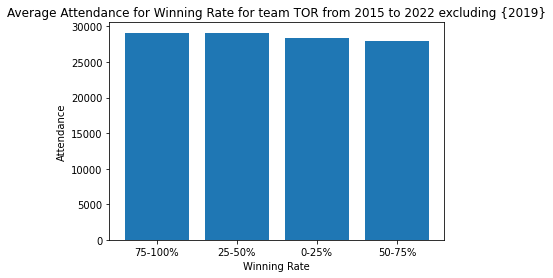

In [91]:
plot_winning_rate_hist(df, "TOR")

In [134]:
def plot_prevWinorLose(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
   # plot bar chart to see the previous win or lose and attendance
   # calculate previous win attendance mean
   df = accumulated_season_record
   prev_win_attendance = df[df["Prev_W/L"] == "W"]["Attendance"].mean()
   # calculate previous lose attendance mean
   prev_lose_attendance = df[df["Prev_W/L"] == "L"]["Attendance"].mean()
   # plot bar chart
   # print(f"previous win counts {df['Prev_W/L'].value_counts()['W']}")
   # print(f"previous lose counts {df['Prev_W/L'].value_counts()['L']}")
   # print(f"previous win attendance mean {prev_win_attendance}")
   # print(f"previous lose attendance mean {prev_lose_attendance}")
   plt.bar(["W", "L"], [prev_win_attendance, prev_lose_attendance])
   plt.title(f"Average Attendance for Previous Win or Lose for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
   plt.xlabel("Previous Win or Lose")
   plt.ylabel("Attendance")

previous win counts 542
previous lose counts 483
previous win attendance mean 28752.480079681274
previous lose attendance mean 28497.152317880795


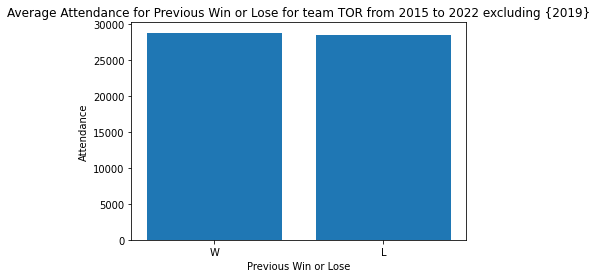

In [116]:
plot_prevWinorLose(df, "TOR")

In [133]:
def plot_streak(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the streak and attendance
    # calculate streak attendance mean
    df = accumulated_season_record
    df = df.dropna(subset=["Prev_Streak"])
    streak_attendance = [df[df["Prev_Streak"] == streak]["Attendance"].mean() for streak in df["Prev_Streak"].unique()]
    # if streak_attendance contains nan, replace it with 0
    streak_attendance = [0 if math.isnan(attendance) else attendance for attendance in streak_attendance]
    # plot bar chart
    # print("streak unique values: ", df["Prev_Streak"].unique())
    # print("attendance for streak: ", streak_attendance)
    plt.bar(df["Prev_Streak"].unique(), streak_attendance)
    plt.xticks(df["Prev_Streak"].unique())
    plt.title(f"Average Attendance for Streak for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Streak")
    plt.ylabel("Attendance")

streak unique values:  [ 1.  2. -1. -2. -3. -4.  3.  4. -5.  5.  6.  7. -6. -7.  8.  9. 10. 11.]
attendance for streak:  [28465.699604743084, 28075.669491525423, 28564.027559055117, 28982.69298245614, 30173.58823529412, 24268.095238095237, 28864.859375, 29791.870967741936, 21140.11111111111, 26742.846153846152, 32044.571428571428, 37642.0, 25786.0, 40743.0, 29115.0, 40877.5, 41599.0, 34430.5]


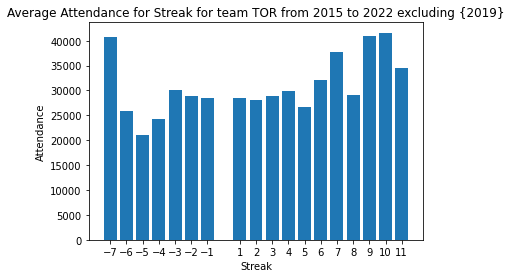

In [118]:
plot_streak(df, "TOR")

In [132]:
def plot_day(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the game day and attendance
    # calculate game day attendance mean
    df = accumulated_season_record
    day_attendance = [df[df["Day"] == day]["Attendance"].mean() for day in df["Day"].unique()]
    # plot bar chart
    # print("day unique values: ", df["Day"].unique())
    # print("attendance for day: ", day_attendance)
    plt.bar(df["Day"].unique(), day_attendance)
    plt.title(f"Average Attendance for Day for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Day")
    plt.ylabel("Attendance")

day unique values:  ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Friday' 'Saturday' 'Thursday']
attendance for day:  [32040.108280254775, 26060.81818181818, 25008.401360544216, 26076.136054421768, 29804.825806451612, 33081.53164556962, 26589.23469387755]


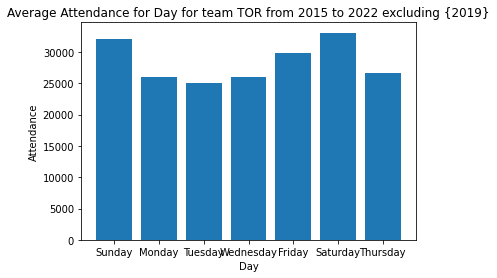

In [120]:
plot_day(df, "TOR")

In [131]:
def plot_month(accumulated_season_record: pd.DataFrame, team_abbr: str, start_year: int = 2015, end_year: int = 2022, exclude_years: set = {2019}):
    # plot bar chart to see the game month and attendance
    # calculate game month attendance mean
    df = accumulated_season_record
    month_attendance = [df[df["Month"] == month]["Attendance"].mean() for month in df["Month"].unique()]
    # plot bar chart
    # print("month unique values: ", df["Month"].unique())
    # print("attendance for month: ", month_attendance)
    plt.bar(df["Month"].unique(), month_attendance)
    plt.title(f"Average Attendance for Month for team {team_abbr} from {start_year} to {end_year} excluding {exclude_years}")
    plt.xlabel("Month")
    plt.ylabel("Attendance")

month unique values:  ['Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Mar']
attendance for month:  [25840.853146853147, 25963.725609756097, 28309.95625, 32021.567567567567, 30547.684523809523, 29267.714285714286, 27600.428571428572, 39841.0]


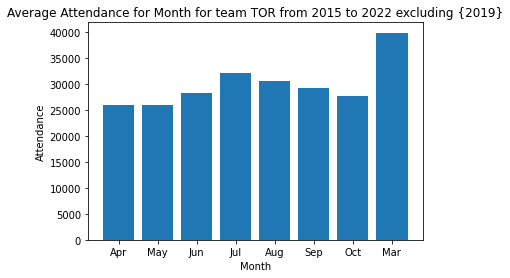

In [122]:
plot_month(df, "TOR")

## For every team, use the function to get the season record and plot related analysis and save the plot

In [191]:
def save_all_statistical_images(teams: list[str]) -> None:
    df = None
    for team in teams:
        if df is None:
            df = generate_accumulated_season_record(team)
        else:
            df = pd.concat([df, generate_accumulated_season_record(team)])
    team = "ALL"
    print(f"Processing team {team}")
    plot_winning_rate_hist(df, team)
    # create a directory for each team if it does not exist
    if not os.path.exists(f"images/{team}"):
        os.makedirs(f"images/{team}")
    plt.savefig(f"images/{team}/winning_rate.jpg")
    plt.clf()
    plot_prevWinorLose(df, team)
    plt.savefig(f"images/{team}/prev_win_or_lose.jpg")
    plt.clf()
    plot_streak(df, team)
    plt.savefig(f"images/{team}/streak.jpg")
    plt.clf()
    plot_day(df, team)
    plt.savefig(f"images/{team}/day.jpg")
    plt.clf()
    plot_month(df, team)
    plt.savefig(f"images/{team}/month.jpg")
    plt.clf()
    print(f"Finished saving team {team} images")

In [190]:
filenames = next(walk("../data/"), (None, None, []))[2]  # [] if no file
teams = set([filename.split("_")[2] for filename in filenames])
print(f"the teams to be processed are {teams}")
save_all_statistical_images(teams)

the teams to be processed are {'MIL', 'SFG', 'TEX', 'CIN', 'DET', 'LAA', 'HOU', 'MIA', 'CHW', 'SDP', 'MIN', 'BOS', 'TBR', 'PHI', 'CLE', 'TOR', 'ARI', 'WSN', 'KCR', 'ATL', 'SEA', 'CHC', 'COL', 'LAD', 'STL', 'BAL', 'PIT', 'NYY', 'OAK', 'NYM'}
